In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

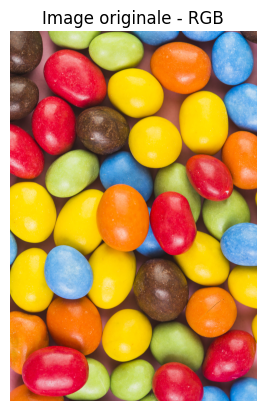

In [ ]:
image = cv2.imread('/content/sweet-colorful-candies2.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Image originale - RGB")
plt.axis('off')
plt.show()

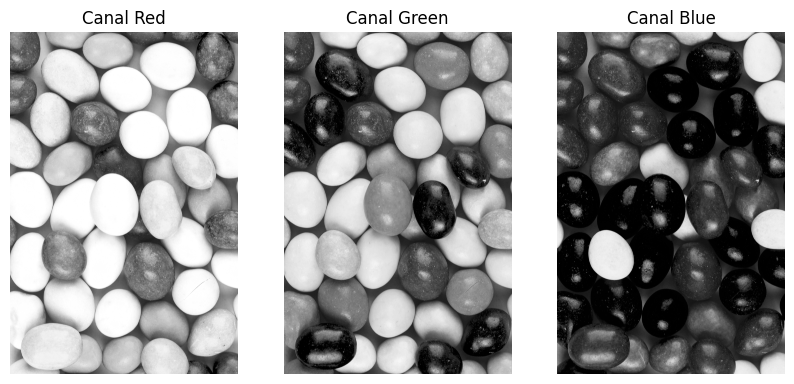

In [11]:
R, G, B = image_rgb[:, :, 0], image_rgb[:, :, 1], image_rgb[:, :, 2]

plt.figure(figsize=(10, 5))
for i, (channel, color) in enumerate(zip([R, G, B], ['Red', 'Green', 'Blue'])):
    plt.subplot(1, 3, i + 1)
    plt.imshow(channel, cmap='gray')
    plt.title(f'Canal {color}')
    plt.axis('off')
plt.show()

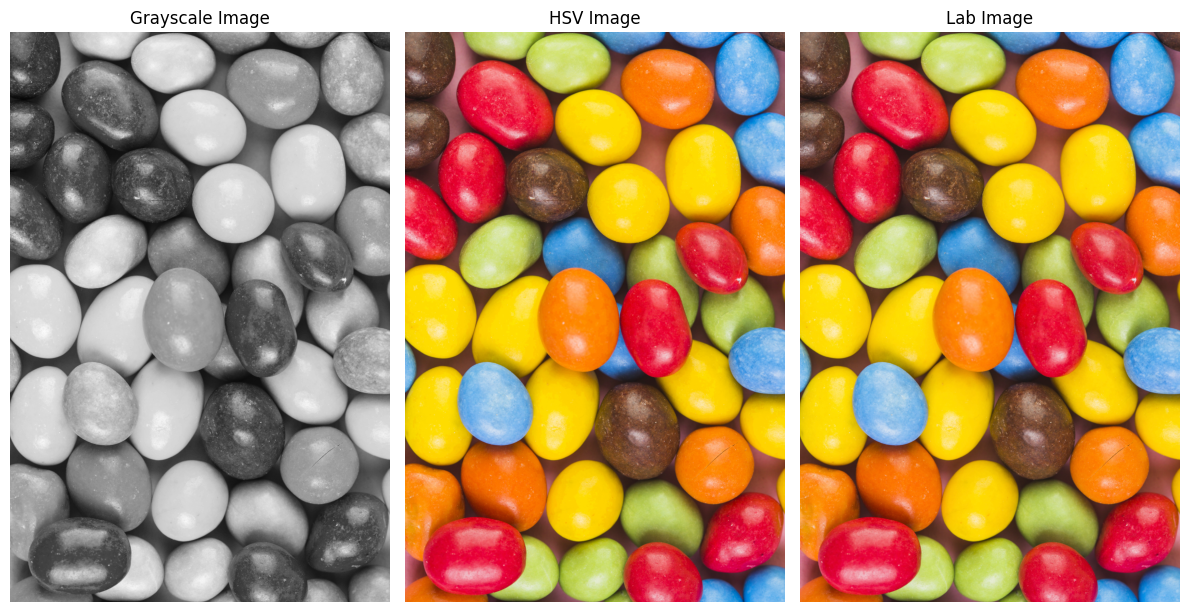

In [ ]:
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
lab_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2Lab)

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

hsv_rgb = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
plt.subplot(1, 3, 2)
plt.imshow(hsv_rgb)
plt.title("HSV Image")
plt.axis("off")

lab_rgb = cv2.cvtColor(lab_image, cv2.COLOR_Lab2RGB)
plt.subplot(1, 3, 3)
plt.imshow(lab_rgb)
plt.title("Lab Image")
plt.axis("off")

plt.tight_layout()
plt.show()

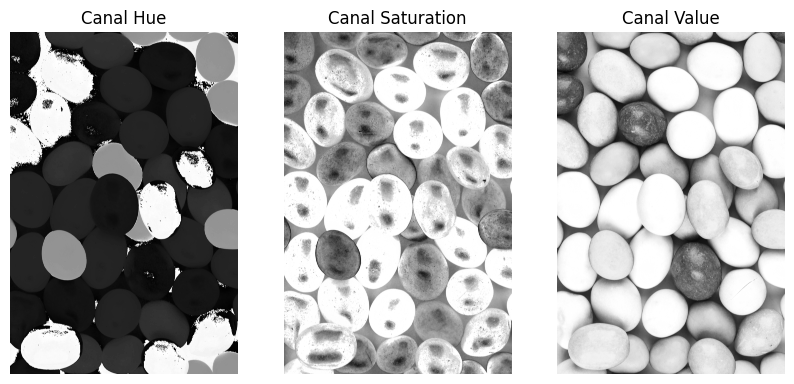

In [13]:
H, S, V = cv2.split(hsv_image)
plt.figure(figsize=(10, 5))
for i, (channel, name) in enumerate(zip([H, S, V], ['Hue', 'Saturation', 'Value'])):
    plt.subplot(1, 3, i + 1)
    plt.imshow(channel, cmap='gray')
    plt.title(f'Canal {name}')
    plt.axis('off')
plt.show()

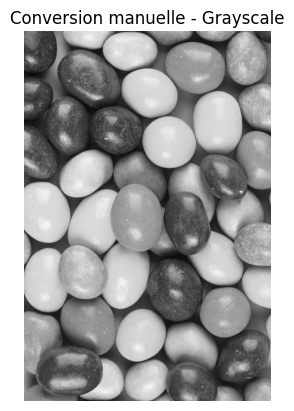

In [14]:
gray_manual = 0.2989 * R + 0.5870 * G + 0.1140 * B
gray_manual = gray_manual.astype(np.uint8)

plt.imshow(gray_manual, cmap='gray')
plt.title("Conversion manuelle - Grayscale")
plt.axis('off')
plt.show()

<ipython-input-15-13b7d45182a1>:10: RuntimeWarning: invalid value encountered in divide
  H[max_val == R] = (60 * ((G[max_val == R] - B[max_val == R]) / delta[max_val == R]) + 360) % 360
<ipython-input-15-13b7d45182a1>:11: RuntimeWarning: invalid value encountered in divide
  H[max_val == G] = (60 * ((B[max_val == G] - R[max_val == G]) / delta[max_val == G]) + 120) % 360
<ipython-input-15-13b7d45182a1>:12: RuntimeWarning: invalid value encountered in divide
  H[max_val == B] = (60 * ((R[max_val == B] - G[max_val == B]) / delta[max_val == B]) + 240) % 360


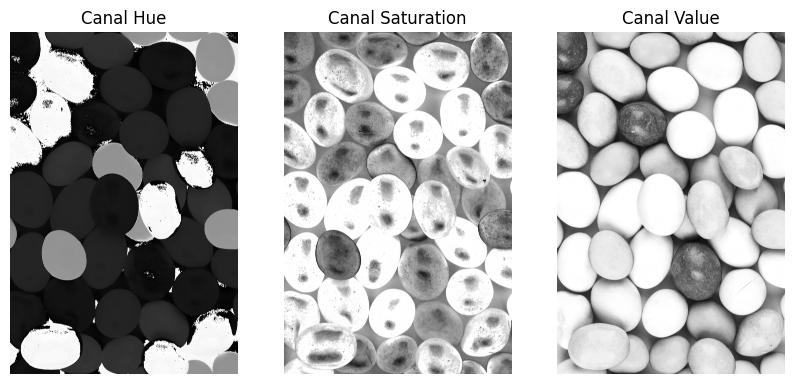

In [ ]:
def rgb_to_hsv_manual(R, G, B):
    R, G, B = R / 255.0, G / 255.0, B / 255.0
    max_val = np.max([R, G, B], axis=0)
    min_val = np.min([R, G, B], axis=0)
    delta = max_val - min_val

    H = np.zeros_like(max_val)
    H[max_val == R] = (60 * ((G[max_val == R] - B[max_val == R]) / delta[max_val == R]) + 360) % 360
    H[max_val == G] = (60 * ((B[max_val == G] - R[max_val == G]) / delta[max_val == G]) + 120) % 360
    H[max_val == B] = (60 * ((R[max_val == B] - G[max_val == B]) / delta[max_val == B]) + 240) % 360
    H[delta == 0] = 0

    S = np.zeros_like(max_val)
    S[max_val != 0] = delta[max_val != 0] / max_val[max_val != 0]

    V = max_val

    H = (H / 360 * 255).astype(np.uint8)
    S = (S * 255).astype(np.uint8)
    V = (V * 255).astype(np.uint8)

    return H, S, V

H_manual, S_manual, V_manual = rgb_to_hsv_manual(R, G, B)

plt.figure(figsize=(10, 5))
for i, (channel, name) in enumerate(zip([H_manual, S_manual, V_manual], ['Hue', 'Saturation', 'Value'])):
    plt.subplot(1, 3, i + 1)
    plt.imshow(channel, cmap='gray')
    plt.title(f'Canal {name}')
    plt.axis('off')
plt.show()

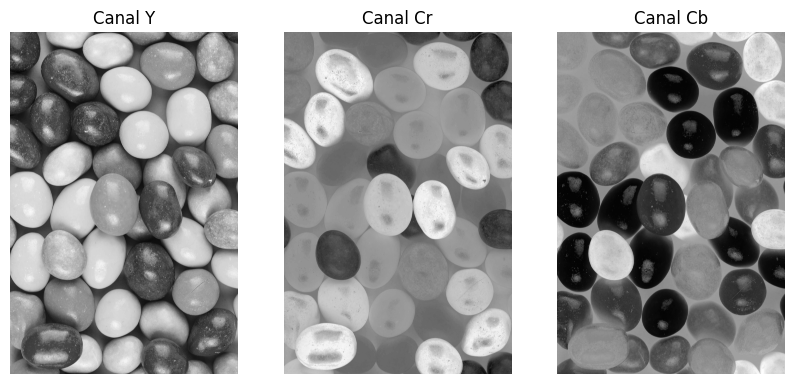

In [ ]:
Y = 0.299 * R + 0.587 * G + 0.114 * B
Cr = 0.5 * R - 0.418688 * G - 0.081312 * B + 128
Cb = -0.168736 * R - 0.331264 * G + 0.5 * B + 128

Y = Y.astype(np.uint8)
Cr = Cr.astype(np.uint8)
Cb = Cb.astype(np.uint8)

plt.figure(figsize=(10, 5))
for i, (channel, name) in enumerate(zip([Y, Cr, Cb], ['Y', 'Cr', 'Cb'])):
    plt.subplot(1, 3, i + 1)
    plt.imshow(channel, cmap='gray')
    plt.title(f'Canal {name}')
    plt.axis('off')
plt.show()